In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1. Dataset Description

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 5209 records and 18 attributes. Variables Each attribute is a potential risk factor. There are demographic, behavioral and medical risk factors.

Attributes:
Demographic:
Sex: male or female(Nominal)
Age: Age of the patient;(Continuous)

Behavioral:
Current Smoker: whether or not the patient is a current smoker (Nominal)

Information on medical history:
AgeCHDdiag: Pateint age at the time of CHD Diagnosis (Continues)
Death Cause: Pateint History of Death 


Information on current medical condition:
Cholestrol: total cholesterol level (Continuous)
Sytolic: systolic blood pressure (Continuous)
Diastolic: diastolic blood pressure (Continuous)
Chol_Status
MRW:Metropolitan Relative Weight,The obesity index chosen to characterize the population was Metropolitan Relative
Weight (MRW), or percentage of desirable weight (the ratio of actual weight to desirable weight x 100).(Continues)
Weight_Status:Nominal

BP_Status: heart rate (Nominal)


In [3]:
df=pd.read_csv("C:/Users/ASUS/Desktop/Heart_Data.csv")

In [4]:
df.head()

,Unnamed: 0,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol,Chol_Status,BP_Status,Weight_Status,Smoking_Status
0,1,Dead,Other,NaN,Female,29,62.50,140.0,78,124,121.0,0.0,55.0,NaN,NaN,Normal,Overweight,Non-smoker
1,2,Dead,Cancer,NaN,Female,41,59.75,194.0,92,144,183.0,0.0,57.0,181.0,Desirable,High,Overweight,Non-smoker
2,3,Alive,NaN,NaN,Female,57,62.25,132.0,90,170,114.0,10.0,NaN,250.0,High,High,Overweight,Moderate (6-15)
3,4,Alive,NaN,NaN,Female,39,65.75,158.0,80,128,123.0,0.0,NaN,242.0,High,Normal,Overweight,Non-smoker
4,5,Alive,NaN,NaN,Male,42,66.00,156.0,76,110,116.0,20.0,NaN,281.0,High,Optimal,Overweight,Heavy (16-25)


In [5]:
df.shape

(5209, 18)

In [6]:
df.columns

Index(['Unnamed: 0', 'Status', 'DeathCause', 'AgeCHDdiag', 'Sex', 'AgeAtStart',
       'Height', 'Weight', 'Diastolic', 'Systolic', 'MRW', 'Smoking',
       'AgeAtDeath', 'Cholesterol', 'Chol_Status', 'BP_Status',
       'Weight_Status', 'Smoking_Status'],
      dtype='object')

# 2 Exploratory Data Analysis

In [7]:
missing_values = df.isnull().sum()
total_percentage = (missing_values.sum()/df.shape[0]) * 100
print(f'The total percentage of missing values are {round(total_percentage,2)}%')

The total percentage of missing values are 203.42%


In [8]:
# percentage of missing values per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
AgeCHDdiag,3760,72.182761
AgeAtDeath,3218,61.777692
DeathCause,3218,61.777692
Chol_Status,152,2.918026
Cholesterol,152,2.918026
Smoking_Status,36,0.691112
Smoking,36,0.691112
MRW,6,0.115185
Weight_Status,6,0.115185
Weight,6,0.115185


# 2.1. Data Cleaning: Handle NA values

In [9]:
df1 = df.drop(['AgeCHDdiag','AgeAtDeath','DeathCause',],axis='columns')
df1.shape

(5209, 15)

In [10]:
df1.isnull().sum()

Unnamed: 0          0
Status              0
Sex                 0
AgeAtStart          0
Height              6
Weight              6
Diastolic           0
Systolic            0
MRW                 6
Smoking            36
Cholesterol       152
Chol_Status       152
BP_Status           0
Weight_Status       6
Smoking_Status     36
dtype: int64

In [11]:
df1.dropna(axis=0, inplace=True)
df1.shape

(5039, 15)

# 2.2 Data Analysis

In [12]:
import seaborn as sns

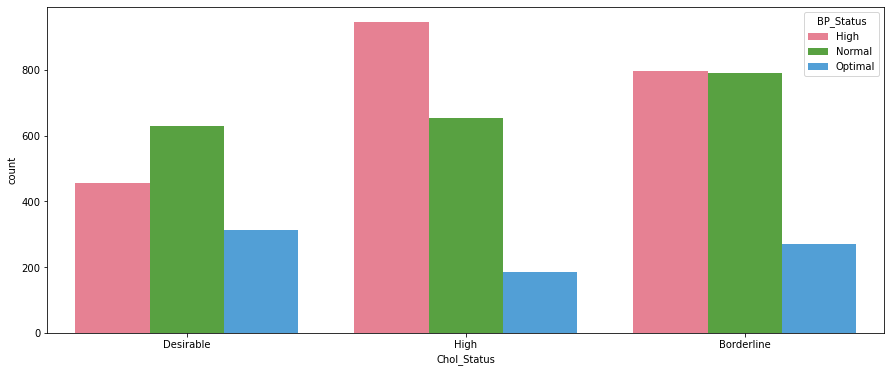

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x='Chol_Status',data = df1, hue = 'BP_Status',palette='husl')
plt.show()

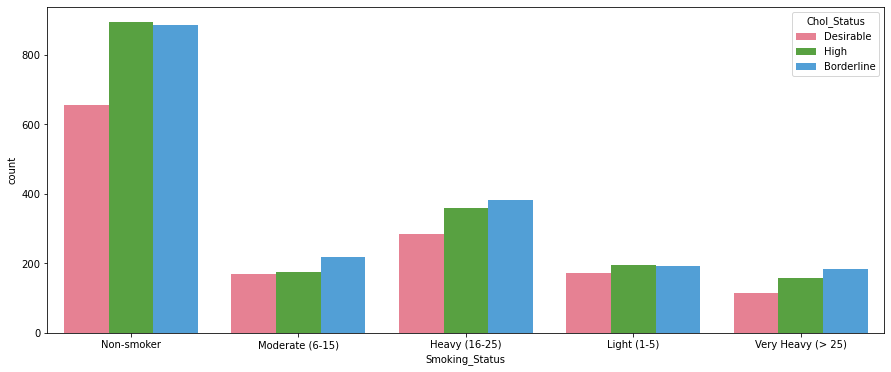

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='Smoking_Status',data = df1, hue = 'Chol_Status',palette='husl')
plt.show()

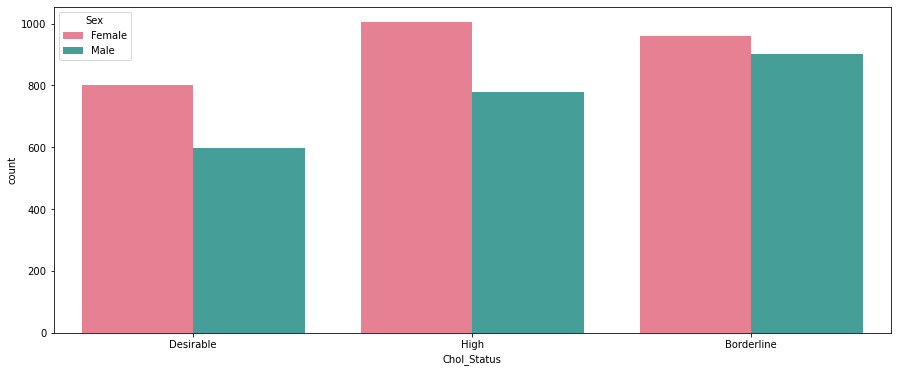

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x='Chol_Status',data = df1, hue = 'Sex',palette='husl')
plt.show()

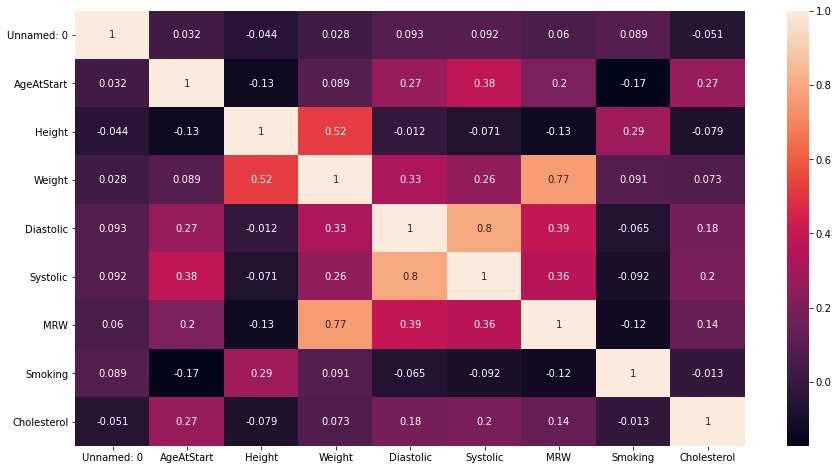

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot = True)
plt.show()